For this project, I would like to apply deep learning to a dataset that has data of people who have heart attacks and their vitals where the target variable is whether the person died or not.

The link to the dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


To implement the 2 layer neural network I have decided to use tensorflow and its higher level package keras. Keras makes it very easy to implement a neural network with just a few lines of code while keeping the efficiency and speed that tenserflow is beloved for. Some resources I used for the project include:

https://www.tensorflow.org/guide/keras/sequential_model - > Learned how to add the layers for the neural network

https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit -> Learned about the fit function

https://www.youtube.com/watch?v=QPDsEtUK_D4 -> a video I watched on the basics of the tensorflow framework 

https://www.easy-tensorflow.com/tf-tutorials/neural-networks/two-layer-neural-network?view=article&id=124:two-layer-neural-network -> A tutorial on how to use tensorflow without keras

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ -> Guide on how to use the keras library to implement a neural network

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import tensorflow as tf
import mlxtend.feature_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [211]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [212]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [213]:
#Start EDA by checking for null values in the dataset
dataset[pd.isnull(dataset).any(axis=1)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [214]:
#No null values in the dataset, check with info to be sure all the types are correct
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [215]:
# check the critical stats for the dataset
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

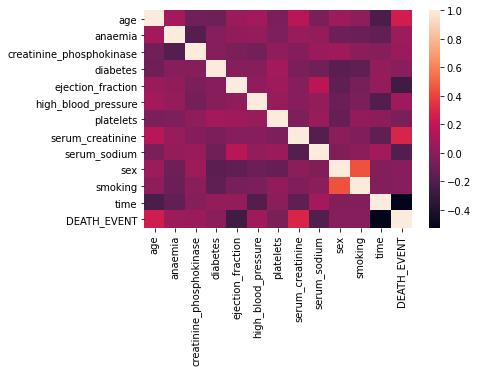

In [216]:
#Plot the correlation 
corr_dataset = dataset.corr()
round(corr_dataset,2)
sns.heatmap(corr_dataset)


In [217]:
#It looks like most independent variables are not very correlated with the target variable, lets do some in depth analysis
# Distribution of age vs death_event
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )


fig.show()



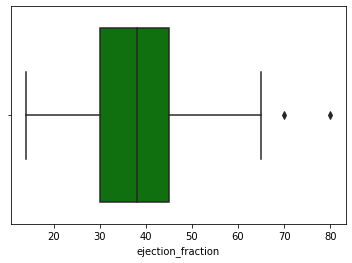

In [218]:
sns.boxplot(x = dataset.ejection_fraction, color = 'green')
plt.show()

[0.0925809  0.02433023 0.0705432  0.02959075 0.13396579 0.02640482
 0.06600952 0.12005271 0.07759615 0.02669384 0.02824859 0.30398352]


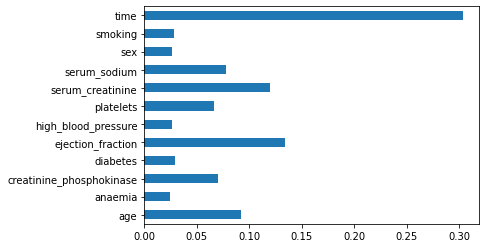

In [219]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns).plot(kind='barh')
plt.show()

In [220]:
# It looks like the most correlated columns to the death event are age, ejection_fraction, time. serum_sodium and serum_creatinine
dataset = dataset.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'smoking', 'sex', 'high_blood_pressure', 'platelets'], axis = 1)

In [221]:
x = dataset.drop('DEATH_EVENT', axis = 1)
y = dataset.DEATH_EVENT
dataset

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


In [222]:
#Split up the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [223]:
#Set the Neural network up using the keras library
#Two layers
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
#Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [224]:
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )
model = nn.fit(x_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
7/7 [==============================] - 0s 936us/step - loss: 5.2237 - accuracy: 0.6746
Epoch 2/100
7/7 [==============================] - 0s 850us/step - loss: 4.6492 - accuracy: 0.6746
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 4.1478 - accuracy: 0.6746
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 3.6651 - accuracy: 0.6746
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 3.1964 - accuracy: 0.6746
Epoch 6/100
7/7 [==============================] - 0s 996us/step - loss: 2.7781 - accuracy: 0.6746
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 2.3932 - accuracy: 0.6746
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 2.0059 - accuracy: 0.6746
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 1.7031 - accuracy: 0.6986
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 1.3901 - accuracy: 0.7177
Epoch 11/100
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8325
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8325
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8325
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8325
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8325
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8325
Epoch 90/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8325
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8373
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8373
Epoch 93/100
7/7 [==============================] - 0s 912us/step - loss: 0.4467 - accuracy: 0.8325
Epoch 94/100
7/7 [=============

In [225]:
y_pred = nn.predict(x_test)
y_pred = (y_pred > 0.5)

In [226]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8777777777777778


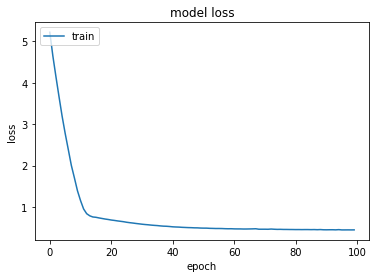

In [227]:
# Plot the loss function
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

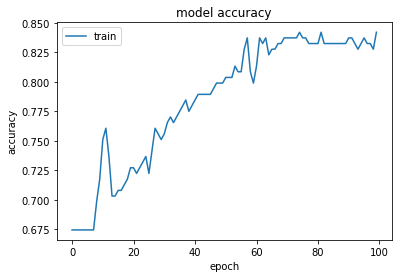

In [228]:
#plot accuracy
plt.plot(model.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [208]:
report = classification_report(y_test, y_pred)

In [209]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        54
           1       0.96      0.67      0.79        36

    accuracy                           0.86        90
   macro avg       0.89      0.82      0.84        90
weighted avg       0.87      0.86      0.85        90



Hyperparameters used in the deep learning neural network are batch_size as 32 and epochs as 100. To determine what these hyperparameters should be I did some research on they work and what exactly they do with the dataset. I learned that we use epoch because it is not enough to run the dataset through the neural network once to get the best results and we use batch size because we do not pass the entire dataset at once, we divide it into an appropriate parts to make it easier for our neural network to process the dataset easier. I decided to go with the values I did because my dataset is not very diverse or a huge one, so 100 iterations on the dataset split into 32 batch sizes should be more than enough to use my model to the maximum capacity. I tested through trial and error by changing both the epochs and batch size and accuaracy results were very similar.

I did not use regularization  because the dataset is not very diverse or huge, it also did not have any major discrepancies so it would be overkill to do any regularization.

I used the Adam optimizer in the compilation stage to get better results from the model. The accuracy increased by 0.7% from the optimizer.